In [1]:
import pandas as pd

import numpy as np

In [3]:
df_member = pd.read_csv('/kaggle/input/data-science-competition-2024-kominfo/member_data.csv')

df_prodgram = pd.read_csv('/kaggle/input/data-science-competition-2024-kominfo/prodgram_data.csv')

df_train = pd.read_csv('/kaggle/input/data-science-competition-2024-kominfo/train_transaction_data.csv')

df_product = pd.read_csv('/kaggle/input/data-science-competition-2024-kominfo/product_data.csv')

df_labels = pd.read_csv('/kaggle/input/data-science-competition-2024-kominfo/train_label_data.csv')

df_test = pd.read_csv('/kaggle/input/data-science-competition-2024-kominfo/test_transaction_data.csv')

df_sub = pd.read_csv('/kaggle/input/data-science-competition-2024-kominfo/submission_data.csv')



pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

# Split Data Member

In [4]:
df_member_test = df_member.copy()

df_member.head()

,MemberID,JoinDate,DateOfBirth,City,NoOfChild,EldestKidDOB,YoungestKidDOB
0,3d47296d92956ad3669769c16318a2de,2013-07-17,1983-04-01,KUBU RAYA,3,2011-07-03,2019-03-25
1,94f2dbc9b6ae8689663b168b6bcff3ca,2016-11-25,2016-11-25,MAKASAR,2,2014-09-05,2017-12-26
2,23e22dbecfa0564d43d79bb32694b557,2016-11-30,2017-02-06,BEKASI,1,2015-03-10,2015-03-10
3,eb7cd93fd803f3ec057d0fc144b3ea22,2016-12-01,2016-12-01,SEMARANG,1,2015-11-06,2015-11-06
4,2065ab9406e66082dc01faeceba90d42,2016-12-05,2017-04-28,SEMARANG,3,2013-07-08,2016-03-12


In [5]:
cond = df_member_test['MemberID'].isin(df_labels['MemberID'])

df_member_test.drop(df_member_test[cond].index, inplace = True)

In [6]:
df_member_test.shape

(6381, 7)

In [7]:
cond2 = df_member['MemberID'].isin(df_member_test['MemberID'])

df_member.drop(df_member[cond2].index, inplace = True)

df_member.shape

(40020, 7)

# Preprocessing

## Train Transaction & Test Transaction

### duplicate

In [8]:
df_train.shape

(130854, 8)

In [9]:
df_test.shape

(21098, 8)

In [10]:
df_train = df_train.drop_duplicates(subset=['TransactionID'], keep='first')

df_test = df_test.drop_duplicates(subset=['TransactionID'], keep='first')

In [11]:
print(df_train.shape)

print(df_test.shape)

(129937, 8)
(20937, 8)


### Null Values

In [12]:
df_train.columns

Index(['TransactionID', 'MemberID', 'Source', 'FK_PRODUCT_ID',
       'FK_PROD_GRAM_ID', 'Qty', 'PricePerUnit', 'TransactionDatetime'],
      dtype='object')

In [13]:
df_test.columns

Index(['TransactionID', 'MemberID', 'Source', 'FK_PRODUCT_ID',
       'FK_PROD_GRAM_ID', 'Qty', 'PricePerUnit', 'TransactionDatetime'],
      dtype='object')

In [14]:
for column in df_train.columns:

    null_count = df_train[column].isnull().sum()

    print(f"{column}: {null_count} nilai null")

TransactionID: 0 nilai null
MemberID: 0 nilai null
Source: 0 nilai null
FK_PRODUCT_ID: 0 nilai null
FK_PROD_GRAM_ID: 0 nilai null
Qty: 0 nilai null
PricePerUnit: 19028 nilai null
TransactionDatetime: 0 nilai null


In [15]:
for column in df_test.columns:

    null_count = df_test[column].isnull().sum()

    print(f"{column}: {null_count} nilai null")

TransactionID: 0 nilai null
MemberID: 0 nilai null
Source: 0 nilai null
FK_PRODUCT_ID: 0 nilai null
FK_PROD_GRAM_ID: 0 nilai null
Qty: 0 nilai null
PricePerUnit: 3153 nilai null
TransactionDatetime: 0 nilai null


In [16]:
print((df_train['PricePerUnit'].isnull().sum() / len(df_train)) * 100)

14.644019794207964


In [17]:
print((df_test['PricePerUnit'].isnull().sum() / len(df_test)) * 100)

15.05946410660553


In [18]:
# df_test['TransactionDatetime'] = pd.to_datetime(df_test['TransactionDatetime'])



# df_train['TransactionMonth'] = df_train['TransactionDatetime'].dt.month



# def impute_price(row):

#     if pd.isnull(row['PricePerUnit']):

#         same_product_data = df_train[

#             (df_train['TransactionMonth'] == row['TransactionMonth']) &

#             (df_train['FK_PRODUCT_ID'] == row['FK_PRODUCT_ID']) &

#             (df_train['FK_PROD_GRAM_ID'] == row['FK_PROD_GRAM_ID']) &

#             (df_train['TransactionMonth'] == row['TransactionMonth']) &

#             (df_train['Source'] == row['Source']) &

#             (df_train['PricePerUnit'].notnull())

#         ]

#         if not same_product_data.empty:

#             return same_product_data['PricePerUnit'].mode()[0]  

#     return row['PricePerUnit']



# df_train['PricePerUnit'] = df_train.apply(impute_price, axis=1)


In [19]:
df_train = pd.merge(df_train, df_member[['MemberID', 'City']], on='MemberID', how='inner')

In [20]:
df_train.head()

,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,TransactionDatetime,City
0,ffd6c035bef03a2c386caf2552148fb2402b0b24,7ef72aa51aecb701dc5c4074480fcdf6,ELANG,27,52,1,NaN,2020-07-01 07:41:00 UTC,BEKASI
1,4fadf10aff7e250cc8d63badeaefdf383c0e1c13,577f1b9a093c2cec6398b1118f5d99ab,ALFAMART,22,39,1,290000.0,2020-07-01 07:24:00 UTC,JAMBI
2,7299df1aaf47b52017f58dd8e59df1fe37072670,e2ee74f248a74ed886a22f14348fbafd,EKTONG,22,39,1,263500.0,2020-07-01 09:13:00 UTC,MAKASAR
3,22dae0e1e8bb87601eabd712721bd249739bc620,cefa8ef7469a8b4e6df3f745d4905000,CITRA,27,52,3,145000.0,2020-07-01 08:28:00 UTC,SIDOARJO
4,6a744d5d79e09b0c1646e604db1c4ec65eff73d7,5eecda17ddf06ed9d79f298b13f84785,INDOMARET,27,52,1,165900.0,2020-07-01 07:02:00 UTC,SUKABUMI


In [21]:
df_train['location'] = df_train['Source'] + '_' + df_train['City']



# Tampilkan hasil untuk memeriksa kolom baru

df_train[['Source', 'City', 'location']].head()

,Source,City,location
0,ELANG,BEKASI,ELANG_BEKASI
1,ALFAMART,JAMBI,ALFAMART_JAMBI
2,EKTONG,MAKASAR,EKTONG_MAKASAR
3,CITRA,SIDOARJO,CITRA_SIDOARJO
4,INDOMARET,SUKABUMI,INDOMARET_SUKABUMI


In [22]:
df_train.head()

,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,TransactionDatetime,City,location
0,ffd6c035bef03a2c386caf2552148fb2402b0b24,7ef72aa51aecb701dc5c4074480fcdf6,ELANG,27,52,1,NaN,2020-07-01 07:41:00 UTC,BEKASI,ELANG_BEKASI
1,4fadf10aff7e250cc8d63badeaefdf383c0e1c13,577f1b9a093c2cec6398b1118f5d99ab,ALFAMART,22,39,1,290000.0,2020-07-01 07:24:00 UTC,JAMBI,ALFAMART_JAMBI
2,7299df1aaf47b52017f58dd8e59df1fe37072670,e2ee74f248a74ed886a22f14348fbafd,EKTONG,22,39,1,263500.0,2020-07-01 09:13:00 UTC,MAKASAR,EKTONG_MAKASAR
3,22dae0e1e8bb87601eabd712721bd249739bc620,cefa8ef7469a8b4e6df3f745d4905000,CITRA,27,52,3,145000.0,2020-07-01 08:28:00 UTC,SIDOARJO,CITRA_SIDOARJO
4,6a744d5d79e09b0c1646e604db1c4ec65eff73d7,5eecda17ddf06ed9d79f298b13f84785,INDOMARET,27,52,1,165900.0,2020-07-01 07:02:00 UTC,SUKABUMI,INDOMARET_SUKABUMI


In [23]:
df_test.head()

,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,TransactionDatetime
0,5f57263c9b0b2b3e3d7c404510dd59060999115a,c2a630e3d0dc77dac0f63424a9ae1438,ALFAMART,27,52,1,165300.0,2020-07-01 06:09:00 UTC
1,b0c438ae346e794fef83c63a9ce17d6df73da233,3ecf7484c08418953e967a20de37051b,ALFAMART,27,52,1,165300.0,2020-07-01 10:13:00 UTC
2,7e2498fc518f0b1489982848a29dc2677ec31367,97bbd6c99a862f20657d9b2b1c77b2c8,ALFAMART,27,52,1,165300.0,2020-07-01 09:27:00 UTC
3,aaa52daf4ca3b8befcbe01362d8219f67293bf45,3ce072ff9c6f2f4b7c95dbc08324a24d,INDOMARET,26,49,1,NaN,2020-07-01 11:04:00 UTC
4,4ec62459fb8d83062284e32f3c7b5af125d242b1,ab0b0de2a1c85a40b5d58644aef745c0,ALFAMART,26,49,2,85500.0,2020-07-01 09:24:00 UTC


In [24]:
df_test = pd.merge(df_test, df_member_test[['MemberID', 'City']], on='MemberID', how='inner')

In [25]:
df_test['location'] = df_test['Source'] + '_' + df_test['City']



# Tampilkan hasil untuk memeriksa kolom baru

df_test[['Source', 'City', 'location']].head()

,Source,City,location
0,ALFAMART,MADIUN,ALFAMART_MADIUN
1,ALFAMART,KEBUMEN,ALFAMART_KEBUMEN
2,ALFAMART,BOGOR,ALFAMART_BOGOR
3,INDOMARET,PALEMBANG,INDOMARET_PALEMBANG
4,ALFAMART,SURABAYA,ALFAMART_SURABAYA


In [26]:
df_test.head()

,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,TransactionDatetime,City,location
0,5f57263c9b0b2b3e3d7c404510dd59060999115a,c2a630e3d0dc77dac0f63424a9ae1438,ALFAMART,27,52,1,165300.0,2020-07-01 06:09:00 UTC,MADIUN,ALFAMART_MADIUN
1,b0c438ae346e794fef83c63a9ce17d6df73da233,3ecf7484c08418953e967a20de37051b,ALFAMART,27,52,1,165300.0,2020-07-01 10:13:00 UTC,KEBUMEN,ALFAMART_KEBUMEN
2,7e2498fc518f0b1489982848a29dc2677ec31367,97bbd6c99a862f20657d9b2b1c77b2c8,ALFAMART,27,52,1,165300.0,2020-07-01 09:27:00 UTC,BOGOR,ALFAMART_BOGOR
3,aaa52daf4ca3b8befcbe01362d8219f67293bf45,3ce072ff9c6f2f4b7c95dbc08324a24d,INDOMARET,26,49,1,NaN,2020-07-01 11:04:00 UTC,PALEMBANG,INDOMARET_PALEMBANG
4,4ec62459fb8d83062284e32f3c7b5af125d242b1,ab0b0de2a1c85a40b5d58644aef745c0,ALFAMART,26,49,2,85500.0,2020-07-01 09:24:00 UTC,SURABAYA,ALFAMART_SURABAYA


In [27]:
df_train['TransactionDatetime'] = pd.to_datetime(df_train['TransactionDatetime'])



df_train['TransactionMonth'] = df_train['TransactionDatetime'].dt.month



mode_prices = df_train.groupby(

    ['TransactionMonth', 'FK_PRODUCT_ID', 'FK_PROD_GRAM_ID', 'location']

)['PricePerUnit'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()



df_train = df_train.merge(

    mode_prices, 

    on=['TransactionMonth', 'FK_PRODUCT_ID', 'FK_PROD_GRAM_ID', 'location'], 

    how='left', 

    suffixes=('', '_mode')

)



df_train['PricePerUnit'] = df_train['PricePerUnit'].combine_first(df_train['PricePerUnit_mode'])



df_train.drop(columns=['PricePerUnit_mode'], inplace=True)



print(df_train.head())


                              TransactionID                          MemberID  \
0  ffd6c035bef03a2c386caf2552148fb2402b0b24  7ef72aa51aecb701dc5c4074480fcdf6   
1  4fadf10aff7e250cc8d63badeaefdf383c0e1c13  577f1b9a093c2cec6398b1118f5d99ab   
2  7299df1aaf47b52017f58dd8e59df1fe37072670  e2ee74f248a74ed886a22f14348fbafd   
3  22dae0e1e8bb87601eabd712721bd249739bc620  cefa8ef7469a8b4e6df3f745d4905000   
4  6a744d5d79e09b0c1646e604db1c4ec65eff73d7  5eecda17ddf06ed9d79f298b13f84785   

      Source  FK_PRODUCT_ID  FK_PROD_GRAM_ID  Qty  PricePerUnit  \
0      ELANG             27               52    1      155000.0   
1   ALFAMART             22               39    1      290000.0   
2     EKTONG             22               39    1      263500.0   
3      CITRA             27               52    3      145000.0   
4  INDOMARET             27               52    1      165900.0   

        TransactionDatetime      City            location  TransactionMonth  
0 2020-07-01 07:41:00+00:00    B

In [28]:
df_train['PricePerUnit'].isnull().sum()

2315

In [29]:
print((df_train['PricePerUnit'].isnull().sum() / len(df_train)) * 100)

1.781632637355026


In [30]:
# df_train = df_train.dropna(subset=['PricePerUnit'])

In [31]:
df_train['PricePerUnit'] = df_train.groupby('FK_PRODUCT_ID')['PricePerUnit'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [32]:
df_train['PricePerUnit'].isnull().sum()

0

In [33]:
df_test['TransactionDatetime'] = pd.to_datetime(df_test['TransactionDatetime'])



df_test['TransactionMonth'] = df_test['TransactionDatetime'].dt.month



mode_prices_test = df_test.groupby(

    ['TransactionMonth', 'FK_PRODUCT_ID', 'FK_PROD_GRAM_ID', 'location']

)['PricePerUnit'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()



df_test = df_test.merge(

    mode_prices_test, 

    on=['TransactionMonth', 'FK_PRODUCT_ID', 'FK_PROD_GRAM_ID', 'location'], 

    how='left', 

    suffixes=('', '_mode')

)



df_test['PricePerUnit'] = df_test['PricePerUnit'].combine_first(df_test['PricePerUnit_mode'])



df_test.drop(columns=['PricePerUnit_mode'], inplace=True)



print(df_test.head())


                              TransactionID                          MemberID  \
0  5f57263c9b0b2b3e3d7c404510dd59060999115a  c2a630e3d0dc77dac0f63424a9ae1438   
1  b0c438ae346e794fef83c63a9ce17d6df73da233  3ecf7484c08418953e967a20de37051b   
2  7e2498fc518f0b1489982848a29dc2677ec31367  97bbd6c99a862f20657d9b2b1c77b2c8   
3  aaa52daf4ca3b8befcbe01362d8219f67293bf45  3ce072ff9c6f2f4b7c95dbc08324a24d   
4  4ec62459fb8d83062284e32f3c7b5af125d242b1  ab0b0de2a1c85a40b5d58644aef745c0   

      Source  FK_PRODUCT_ID  FK_PROD_GRAM_ID  Qty  PricePerUnit  \
0   ALFAMART             27               52    1      165300.0   
1   ALFAMART             27               52    1      165300.0   
2   ALFAMART             27               52    1      165300.0   
3  INDOMARET             26               49    1       86900.0   
4   ALFAMART             26               49    2       85500.0   

        TransactionDatetime       City             location  TransactionMonth  
0 2020-07-01 06:09:00+00:00   

In [34]:
df_train['PricePerUnit'].isnull().sum()

0

### Imbalanced Data

In [35]:
# import matplotlib.pyplot as plt

# import seaborn as sns



# # Set ukuran plot untuk meningkatkan keterbacaan

# plt.figure(figsize=(15, 6))



# # Plot untuk kolom 'Source'

# plt.subplot(1, 3, 1)

# sns.countplot(data=df_train, x='Source', palette='viridis')

# plt.title('Distribution of Source')

# plt.xticks(rotation=45, ha='right', fontsize=8)



# # Plot untuk kolom 'FK_PRODUCT_ID'

# plt.subplot(1, 3, 2)

# sns.countplot(data=df_train, x='FK_PRODUCT_ID', palette='viridis')

# plt.title('Distribution of FK_PRODUCT_ID')

# plt.xticks(rotation=90)



# # Plot untuk kolom 'TransactionMonth'

# plt.subplot(1, 3, 3)

# sns.countplot(data=df_train, x='TransactionMonth', palette='viridis')

# plt.title('Distribution of TransactionMonth')

# plt.xticks(rotation=45)



# # Menampilkan plot

# plt.tight_layout()

# plt.show()


In [36]:
# def check_imbalance_and_undersample(df, column):

#     counts = df[column].value_counts(normalize=True) * 100  # Menghitung persentase tiap kategori

#     absolute_counts = df[column].value_counts()  # Menghitung jumlah absolut tiap kategori

#     print(f"Distribusi di '{column}':\n{counts}\n")



#     # Mengecek imbalance

#     if counts.max() > 70:  # Threshold contoh 70%

#         print(f"The '{column}' column appears to be imbalanced.")

        

#         # Menentukan kategori mayoritas dan minoritas

#         majority_class = absolute_counts.idxmax()

#         majority_count = absolute_counts.max()

#         minority_count = absolute_counts.min()



#         # Rasio mayoritas terhadap minoritas

#         imbalance_ratio = majority_count / minority_count



#         print(f"Majority class: '{majority_class}' with {majority_count} instances.")

#         print(f"Minority class with {minority_count} instances.")

#         print(f"Imbalance ratio: {imbalance_ratio:.2f}")



#         # Rekomendasi undersampling jika rasio imbalance terlalu tinggi

#         if imbalance_ratio > 2:  # Threshold contoh untuk undersampling

#             print(f"Consider applying undersampling for the '{column}' column.\n")

#         else:

#             print(f"Undersampling may not be necessary for the '{column}' column.\n")

#     else:

#         print(f"The '{column}' column appears to be balanced.\n")



# # Cek imbalance dan rekomendasi undersampling untuk kolom yang diinginkan

# check_imbalance_and_undersample(df_train, 'Source')

# check_imbalance_and_undersample(df_train, 'FK_PRODUCT_ID')

# check_imbalance_and_undersample(df_train, 'TransactionMonth')


# RFM

## Recency

### train

In [37]:
df_train['TransactionDatetime'] = pd.to_datetime(df_train['TransactionDatetime'])



df_train['year'] = df_train['TransactionDatetime'].dt.year

df_train['month'] = df_train['TransactionDatetime'].dt.month





required_year = 2021



# required_months = [1, 2, 3, 4, 5, 6]

required_months = [5, 6]





def check_transaction(member_df):

    # member_df_year = member_df[member_df['year'] == required_year]

    member_months = member_df['month'].unique()

    if sum(month in member_months for month in required_months) > 1:

        return 1  

    else:

        return 0  



df_result_train = df_train.groupby('MemberID').apply(check_transaction).reset_index(name='transaction_status')

df_result_train = pd.merge(df_labels, df_result_train, on='MemberID', how='inner')

# df_result_train = df_result_train.drop(columns=['next_buy'])



#df_result_train.to_csv('train_member_transaction_status_2021.csv', index=False)



print(df_result_train.head(50))

                            MemberID  next_buy  transaction_status
0   7ef72aa51aecb701dc5c4074480fcdf6         0                   0
1   577f1b9a093c2cec6398b1118f5d99ab         0                   0
2   e2ee74f248a74ed886a22f14348fbafd         0                   0
3   cefa8ef7469a8b4e6df3f745d4905000         0                   0
4   5eecda17ddf06ed9d79f298b13f84785         0                   0
5   51b86190f095fc26d50fb885ccf3882f         1                   1
6   d90dfeb1f33779390d1170d27e9fb791         0                   0
7   8ccc5cccb5a8531cf2bf7f73ef5745d9         0                   0
8   467aeb812e8fb65091d10ca22c95e204         0                   0
9   f3b5eaa60ddf26eca40537fbc6df3242         0                   0
10  13444873ba3f10ecc5f573a2b34a809c         0                   0
11  867eaaef5499485a9b19679c72dadd57         0                   0
12  b75121988023f1867ecdf5f7434f0d20         0                   0
13  d8b59847637e86bd83dfa5cf0e5b5772         0                

/tmp/ipykernel_31/3642044039.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_result_train = df_train.groupby('MemberID').apply(check_transaction).reset_index(name='transaction_status')


In [38]:
# df_train['TransactionDatetime'] = pd.to_datetime(df_train['TransactionDatetime'])



# overall_last_transaction = df_train['TransactionDatetime'].max()



# last_transaction_per_member = df_train.groupby('MemberID')['TransactionDatetime'].max().reset_index()

# last_transaction_per_member.columns = ['MemberID', 'last_transaction_date']



# last_transaction_per_member['recency_duration'] = (overall_last_transaction - last_transaction_per_member['last_transaction_date']).dt.days

 

# last_transaction_per_member.head(20)

In [39]:
df_train['TransactionDatetime'].head()

0   2020-07-01 07:41:00+00:00
1   2020-07-01 07:24:00+00:00
2   2020-07-01 09:13:00+00:00
3   2020-07-01 08:28:00+00:00
4   2020-07-01 07:02:00+00:00
Name: TransactionDatetime, dtype: datetime64[ns, UTC]

In [40]:
df_train['transactiondate'] = df_train['TransactionDatetime'].dt.date



# Ambil MemberID yang ada di df_member

member_ids = df_member['MemberID'].unique()



# Cari tanggal transaksi maksimal secara keseluruhan

max_transaction_date = df_train['transactiondate'].max()



# Cari tanggal transaksi terakhir untuk setiap member

last_transaction_per_member = df_train.groupby('MemberID')['transactiondate'].max().reset_index()



# Filter last_transaction_per_member hanya untuk MemberID yang ada di df_member

last_transaction_per_member_filtered = last_transaction_per_member[last_transaction_per_member['MemberID'].isin(member_ids)]





# Hitung recency sebagai selisih antara max_transaction_date dan last_transaction_date

df_result_train = pd.merge(last_transaction_per_member_filtered, df_result_train, on='MemberID', how='right')

df_result_train['recency'] = (pd.to_datetime(max_transaction_date) - pd.to_datetime(df_result_train['transactiondate'])).dt.days



# Output hasil

print(df_result_train.head(20))


                            MemberID transactiondate  next_buy  \
0   7ef72aa51aecb701dc5c4074480fcdf6      2021-04-25         0   
1   577f1b9a093c2cec6398b1118f5d99ab      2021-02-03         0   
2   e2ee74f248a74ed886a22f14348fbafd      2020-07-01         0   
3   cefa8ef7469a8b4e6df3f745d4905000      2020-08-01         0   
4   5eecda17ddf06ed9d79f298b13f84785      2020-08-24         0   
5   51b86190f095fc26d50fb885ccf3882f      2021-06-25         1   
6   d90dfeb1f33779390d1170d27e9fb791      2021-03-30         0   
7   8ccc5cccb5a8531cf2bf7f73ef5745d9      2021-03-08         0   
8   467aeb812e8fb65091d10ca22c95e204      2020-07-24         0   
9   f3b5eaa60ddf26eca40537fbc6df3242      2020-10-04         0   
10  13444873ba3f10ecc5f573a2b34a809c      2020-10-06         0   
11  867eaaef5499485a9b19679c72dadd57      2020-07-01         0   
12  b75121988023f1867ecdf5f7434f0d20      2021-05-24         0   
13  d8b59847637e86bd83dfa5cf0e5b5772      2021-04-10         0   
14  74a242

In [41]:
print(max_transaction_date)

2021-06-30


In [42]:
# df_result_train = df_member[['MemberID']].copy()

# df_result_train = pd.merge(df_labels, df_result_train, on='MemberID', how='inner')

# df_result_train = pd.merge(last_transaction_per_member[['MemberID', 'recency_duration']], df_result_train, on='MemberID', how='left')



# print(df_result_train.head(50))

In [43]:
df_result_train.shape

(40020, 5)

In [44]:
df_result_train.head()

,MemberID,transactiondate,next_buy,transaction_status,recency
0,7ef72aa51aecb701dc5c4074480fcdf6,2021-04-25,0,0,66
1,577f1b9a093c2cec6398b1118f5d99ab,2021-02-03,0,0,147
2,e2ee74f248a74ed886a22f14348fbafd,2020-07-01,0,0,364
3,cefa8ef7469a8b4e6df3f745d4905000,2020-08-01,0,0,333
4,5eecda17ddf06ed9d79f298b13f84785,2020-08-24,0,0,310


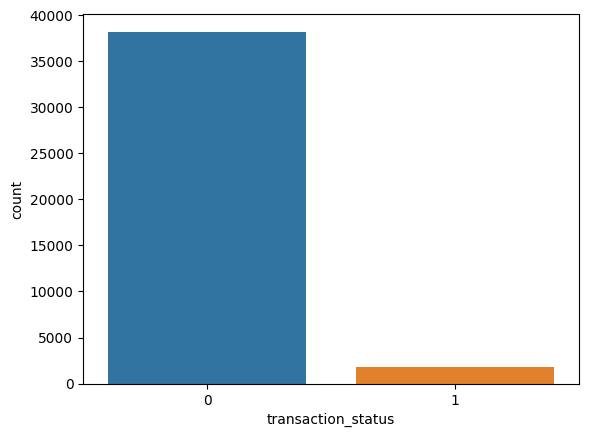

Percent of member buying:  4.515242378810594 %


In [45]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.countplot(x='transaction_status', data=df_result_train)

plt.show()

print('Percent of member buying: ',len(df_result_train[df_result_train['transaction_status']==1])/len(df_result_train['transaction_status'])*100,"%")

### test

In [46]:
df_test['TransactionDatetime'] = pd.to_datetime(df_test['TransactionDatetime'])



df_test['year'] = df_test['TransactionDatetime'].dt.year

df_test['month'] = df_test['TransactionDatetime'].dt.month





# required_year = 2021



# required_months = [1, 2, 3, 4, 5, 6]

required_months = [5, 6]





def check_transaction(member_df):

    # member_df_year = member_df[member_df['year'] == required_year]

    member_months = member_df['month'].unique()

    if sum(month in member_months for month in required_months) >= 1:

        return 1  

    else:

        return 0  



df_result_test = df_test.groupby('MemberID').apply(check_transaction).reset_index(name='transaction_status')

df_result_test = pd.merge(df_sub, df_result_test, on='MemberID', how='inner')

#df_result_test = df_result_test.drop(columns=['next_buy'])



#df_result_test.to_csv('train_member_transaction_status_2021.csv', index=False)



print(df_result_test.head(100))

                            MemberID  next_buy  transaction_status
0   c2a630e3d0dc77dac0f63424a9ae1438         1                   0
1   3ecf7484c08418953e967a20de37051b         1                   0
2   97bbd6c99a862f20657d9b2b1c77b2c8         0                   0
3   3ce072ff9c6f2f4b7c95dbc08324a24d         0                   0
4   ab0b0de2a1c85a40b5d58644aef745c0         1                   0
5   a70471d4e5713313b6ec18ce99b2accf         0                   0
6   8510b5b30229d18d721ca90f4c84379d         0                   1
7   60a5585b2223ffb1ee0fadebb74c4b0d         1                   0
8   b49dcf1b7ad266a91684009fb88d5e7d         0                   0
9   e67ec9ac3eb17a28abbb9015cbcd1b9a         0                   0
10  f1f017276335ffd0fd98c249da76bb03         0                   0
11  894a6fe704edbb6fb864aa08acd8c794         1                   0
12  df5f8f5700a20adc20cfec3e5b61e509         0                   0
13  d64cddf62a5dcfa497882867b80bc9f7         0                

/tmp/ipykernel_31/1182778999.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_result_test = df_test.groupby('MemberID').apply(check_transaction).reset_index(name='transaction_status')


In [47]:
df_test['transactiondate'] = df_test['TransactionDatetime'].dt.date



# Ambil MemberID yang ada di df_member

member_ids_test = df_member_test['MemberID'].unique()



# Cari tanggal transaksi maksimal secara keseluruhan

max_transaction_date_test = df_test['transactiondate'].max()



# Cari tanggal transaksi terakhir untuk setiap member

last_transaction_per_member_test = df_test.groupby('MemberID')['transactiondate'].max().reset_index()



# Filter last_transaction_per_member hanya untuk MemberID yang ada di df_member

last_transaction_per_member_filtered_test = last_transaction_per_member_test[last_transaction_per_member_test['MemberID'].isin(member_ids_test)]



# Hitung recency sebagai selisih antara max_transaction_date dan last_transaction_date

df_result_test = pd.merge(last_transaction_per_member_filtered_test, df_result_test, on='MemberID', how='right')

df_result_test['recency'] = (pd.to_datetime(max_transaction_date_test) - pd.to_datetime(df_result_test['transactiondate'])).dt.days



# Output hasil

print(df_result_test.head(20))


                            MemberID transactiondate  next_buy  \
0   c2a630e3d0dc77dac0f63424a9ae1438      2021-02-25         1   
1   3ecf7484c08418953e967a20de37051b      2020-11-04         1   
2   97bbd6c99a862f20657d9b2b1c77b2c8      2021-04-23         0   
3   3ce072ff9c6f2f4b7c95dbc08324a24d      2021-02-24         0   
4   ab0b0de2a1c85a40b5d58644aef745c0      2021-04-08         1   
5   a70471d4e5713313b6ec18ce99b2accf      2020-08-23         0   
6   8510b5b30229d18d721ca90f4c84379d      2021-05-03         0   
7   60a5585b2223ffb1ee0fadebb74c4b0d      2020-09-19         1   
8   b49dcf1b7ad266a91684009fb88d5e7d      2020-11-29         0   
9   e67ec9ac3eb17a28abbb9015cbcd1b9a      2021-03-17         0   
10  f1f017276335ffd0fd98c249da76bb03      2021-01-08         0   
11  894a6fe704edbb6fb864aa08acd8c794      2021-02-28         1   
12  df5f8f5700a20adc20cfec3e5b61e509      2021-03-24         0   
13  d64cddf62a5dcfa497882867b80bc9f7      2020-08-23         0   
14  4720cd

In [48]:
df_result_test.head(50)

,MemberID,transactiondate,next_buy,transaction_status,recency
0,c2a630e3d0dc77dac0f63424a9ae1438,2021-02-25,1,0,125
1,3ecf7484c08418953e967a20de37051b,2020-11-04,1,0,238
2,97bbd6c99a862f20657d9b2b1c77b2c8,2021-04-23,0,0,68
3,3ce072ff9c6f2f4b7c95dbc08324a24d,2021-02-24,0,0,126
4,ab0b0de2a1c85a40b5d58644aef745c0,2021-04-08,1,0,83
5,a70471d4e5713313b6ec18ce99b2accf,2020-08-23,0,0,311
6,8510b5b30229d18d721ca90f4c84379d,2021-05-03,0,1,58
7,60a5585b2223ffb1ee0fadebb74c4b0d,2020-09-19,1,0,284
8,b49dcf1b7ad266a91684009fb88d5e7d,2020-11-29,0,0,213
9,e67ec9ac3eb17a28abbb9015cbcd1b9a,2021-03-17,0,0,105


In [49]:
df_result_test.shape

(6381, 5)

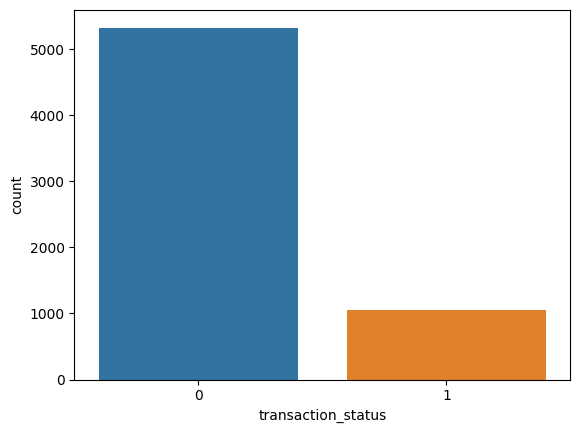

Percent of member buying:  16.53345870553205 %


In [50]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.countplot(x='transaction_status', data=df_result_test)

plt.show()

print('Percent of member buying: ',len(df_result_test[df_result_test['transaction_status']==1])/len(df_result_test['transaction_status'])*100,"%")

## Frequency

### train

In [51]:
df_count = df_train.drop(columns=['TransactionID', 'Source', 'FK_PRODUCT_ID', 'FK_PROD_GRAM_ID', 'Qty', 'PricePerUnit',])

# df_count['Member_dupe'] = df_count.loc[:, 'MemberID']

# df_transaction['totalCount'] = df_transaction.groupby('MemberID').TransactionDatetime.transform('nunique')

# df_count = df_transaction.groupby('MemberID').TransactionDatetime.transform('nunique')

df_count = df_count.groupby('MemberID').count()

# df_count.reset_index(inplace=True)

df_count.head(20)

#df_count.to_csv('train_member_counted.csv')

,TransactionDatetime,City,location,TransactionMonth,year,month,transactiondate
MemberID,,,,,,,
00010c8a563eb5555709c8ae3120ba2e,1,1,1,1,1,1,1
000184877b42ade87143636847f305a8,1,1,1,1,1,1,1
0003a82569e3202cfecc55d987da0f70,11,11,11,11,11,11,11
00045f29692019c0fa274e5330c5dbaf,2,2,2,2,2,2,2
0004aec4786c2b071360a0967b39f4f5,20,20,20,20,20,20,20
000682dbae7a366c6acece0989c5251b,1,1,1,1,1,1,1
000e9cb88de4fb6cc5e313dee4f00946,1,1,1,1,1,1,1
00102e9afe2011df69c19c51f412e702,1,1,1,1,1,1,1
00108ae8011262e30a824176eb1bcb88,21,21,21,21,21,21,21


In [52]:
df_merged_count = pd.merge(df_labels, df_count, on='MemberID', how='inner')

# df_result = df_result.groupby('MemberID')

df_merged_count.head(20)

#df_merged_count.to_csv('test.csv')

,MemberID,next_buy,TransactionDatetime,City,location,TransactionMonth,year,month,transactiondate
0,7ef72aa51aecb701dc5c4074480fcdf6,0,10,10,10,10,10,10,10
1,577f1b9a093c2cec6398b1118f5d99ab,0,10,10,10,10,10,10,10
2,e2ee74f248a74ed886a22f14348fbafd,0,1,1,1,1,1,1,1
3,cefa8ef7469a8b4e6df3f745d4905000,0,2,2,2,2,2,2,2
4,5eecda17ddf06ed9d79f298b13f84785,0,11,11,11,11,11,11,11
5,51b86190f095fc26d50fb885ccf3882f,1,18,18,18,18,18,18,18
6,d90dfeb1f33779390d1170d27e9fb791,0,9,9,9,9,9,9,9
7,8ccc5cccb5a8531cf2bf7f73ef5745d9,0,22,22,22,22,22,22,22
8,467aeb812e8fb65091d10ca22c95e204,0,2,2,2,2,2,2,2
9,f3b5eaa60ddf26eca40537fbc6df3242,0,5,5,5,5,5,5,5


In [53]:
df_merged_count = df_merged_count.rename(columns={"TransactionDatetime" : "Frequency"})

df_merged_count.head(20)

,MemberID,next_buy,Frequency,City,location,TransactionMonth,year,month,transactiondate
0,7ef72aa51aecb701dc5c4074480fcdf6,0,10,10,10,10,10,10,10
1,577f1b9a093c2cec6398b1118f5d99ab,0,10,10,10,10,10,10,10
2,e2ee74f248a74ed886a22f14348fbafd,0,1,1,1,1,1,1,1
3,cefa8ef7469a8b4e6df3f745d4905000,0,2,2,2,2,2,2,2
4,5eecda17ddf06ed9d79f298b13f84785,0,11,11,11,11,11,11,11
5,51b86190f095fc26d50fb885ccf3882f,1,18,18,18,18,18,18,18
6,d90dfeb1f33779390d1170d27e9fb791,0,9,9,9,9,9,9,9
7,8ccc5cccb5a8531cf2bf7f73ef5745d9,0,22,22,22,22,22,22,22
8,467aeb812e8fb65091d10ca22c95e204,0,2,2,2,2,2,2,2
9,f3b5eaa60ddf26eca40537fbc6df3242,0,5,5,5,5,5,5,5


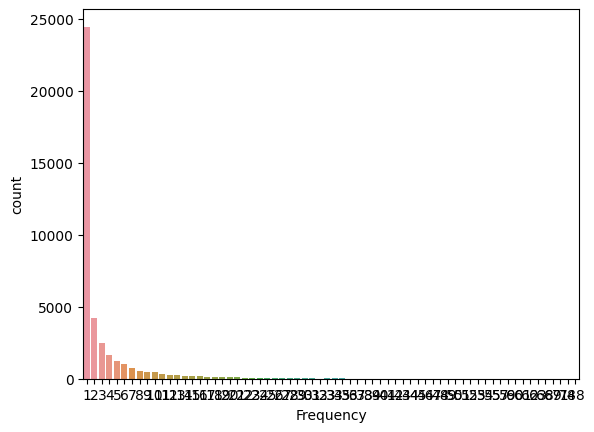

Percent of frequency is low:  61.144427786106945 %


In [54]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.countplot(x='Frequency', data=df_merged_count)

plt.show()

print('Percent of frequency is low: ',len(df_merged_count[df_merged_count['Frequency']==1])/len(df_merged_count['Frequency'])*100,"%")

In [55]:
df_frequency = df_merged_count[['MemberID', 'Frequency']]



df_result_train = df_result_train.merge(df_frequency, on='MemberID', how='right')



print(df_result_train.head())

                           MemberID transactiondate  next_buy  \
0  7ef72aa51aecb701dc5c4074480fcdf6      2021-04-25         0   
1  577f1b9a093c2cec6398b1118f5d99ab      2021-02-03         0   
2  e2ee74f248a74ed886a22f14348fbafd      2020-07-01         0   
3  cefa8ef7469a8b4e6df3f745d4905000      2020-08-01         0   
4  5eecda17ddf06ed9d79f298b13f84785      2020-08-24         0   

   transaction_status  recency  Frequency  
0                   0       66         10  
1                   0      147         10  
2                   0      364          1  
3                   0      333          2  
4                   0      310         11  


### test

In [56]:
df_count_test = df_test.drop(columns=['TransactionID', 'Source', 'FK_PRODUCT_ID', 'FK_PROD_GRAM_ID', 'Qty', 'PricePerUnit',])

# df_count_test['Member_dupe'] = df_count_test.loc[:, 'MemberID']

# df_transaction['totalCount'] = df_transaction.groupby('MemberID').TransactionDatetime.transform('nunique')

# df_count_test = df_transaction.groupby('MemberID').TransactionDatetime.transform('nunique')

df_count_test = df_count_test.groupby('MemberID').count()

# df_count_test.reset_index(inplace=True)

df_count_test.head(20)

#df_count_test.to_csv('train_member_counted.csv')

,TransactionDatetime,City,location,TransactionMonth,year,month,transactiondate
MemberID,,,,,,,
00203ce89a0faaca3202f3de5cffac0b,1,1,1,1,1,1,1
002f29b50734e5f3188aa75246d4af05,1,1,1,1,1,1,1
0037ca0d9bfd58f632be536ddd163523,1,1,1,1,1,1,1
0041d7101fefd95ab1549ef4faa17d43,1,1,1,1,1,1,1
0042532ed72e73e068ee8cbcd7dd42d4,1,1,1,1,1,1,1
004eb292d0a57227d01fdcd1ffd2c14f,1,1,1,1,1,1,1
004eeb110bbc6f7684ab9d994fab3088,3,3,3,3,3,3,3
00534619b653a64175cd9717072d2b2a,1,1,1,1,1,1,1
0059805cc317c95f8da242c18e18a060,1,1,1,1,1,1,1


In [57]:
df_merged_count_test = pd.merge(df_sub, df_count_test, on='MemberID', how='inner')

# df_result = df_result.groupby('MemberID')

df_merged_count_test.head(20)

#df_merged_count_test.to_csv('test.csv')

,MemberID,next_buy,TransactionDatetime,City,location,TransactionMonth,year,month,transactiondate
0,c2a630e3d0dc77dac0f63424a9ae1438,1,3,3,3,3,3,3,3
1,3ecf7484c08418953e967a20de37051b,1,9,9,9,9,9,9,9
2,97bbd6c99a862f20657d9b2b1c77b2c8,0,57,57,57,57,57,57,57
3,3ce072ff9c6f2f4b7c95dbc08324a24d,0,13,13,13,13,13,13,13
4,ab0b0de2a1c85a40b5d58644aef745c0,1,29,29,29,29,29,29,29
5,a70471d4e5713313b6ec18ce99b2accf,0,3,3,3,3,3,3,3
6,8510b5b30229d18d721ca90f4c84379d,0,7,7,7,7,7,7,7
7,60a5585b2223ffb1ee0fadebb74c4b0d,1,5,5,5,5,5,5,5
8,b49dcf1b7ad266a91684009fb88d5e7d,0,4,4,4,4,4,4,4
9,e67ec9ac3eb17a28abbb9015cbcd1b9a,0,17,17,17,17,17,17,17


In [58]:
df_merged_count_test = df_merged_count_test.rename(columns={"TransactionDatetime" : "Frequency"})

df_merged_count_test.head(20)

,MemberID,next_buy,Frequency,City,location,TransactionMonth,year,month,transactiondate
0,c2a630e3d0dc77dac0f63424a9ae1438,1,3,3,3,3,3,3,3
1,3ecf7484c08418953e967a20de37051b,1,9,9,9,9,9,9,9
2,97bbd6c99a862f20657d9b2b1c77b2c8,0,57,57,57,57,57,57,57
3,3ce072ff9c6f2f4b7c95dbc08324a24d,0,13,13,13,13,13,13,13
4,ab0b0de2a1c85a40b5d58644aef745c0,1,29,29,29,29,29,29,29
5,a70471d4e5713313b6ec18ce99b2accf,0,3,3,3,3,3,3,3
6,8510b5b30229d18d721ca90f4c84379d,0,7,7,7,7,7,7,7
7,60a5585b2223ffb1ee0fadebb74c4b0d,1,5,5,5,5,5,5,5
8,b49dcf1b7ad266a91684009fb88d5e7d,0,4,4,4,4,4,4,4
9,e67ec9ac3eb17a28abbb9015cbcd1b9a,0,17,17,17,17,17,17,17


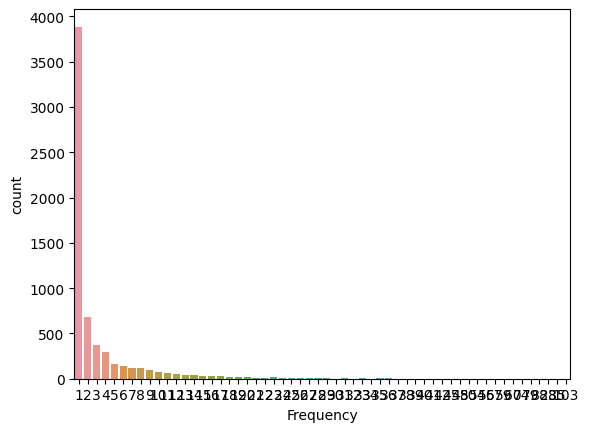

Percent of frequency is low:  60.91521705061903 %


In [59]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.countplot(x='Frequency', data=df_merged_count_test)

plt.show()

print('Percent of frequency is low: ',len(df_merged_count_test[df_merged_count_test['Frequency']==1])/len(df_merged_count_test['Frequency'])*100,"%")

In [60]:
df_frequency_test = df_merged_count_test[['MemberID', 'Frequency']]



df_result_test = df_result_test.merge(df_frequency_test, on='MemberID', how='right')



print(df_result_test.head())

                           MemberID transactiondate  next_buy  \
0  c2a630e3d0dc77dac0f63424a9ae1438      2021-02-25         1   
1  3ecf7484c08418953e967a20de37051b      2020-11-04         1   
2  97bbd6c99a862f20657d9b2b1c77b2c8      2021-04-23         0   
3  3ce072ff9c6f2f4b7c95dbc08324a24d      2021-02-24         0   
4  ab0b0de2a1c85a40b5d58644aef745c0      2021-04-08         1   

   transaction_status  recency  Frequency  
0                   0      125          3  
1                   0      238          9  
2                   0       68         57  
3                   0      126         13  
4                   0       83         29  


## Monetary Value

### train

In [61]:
df_train['TransactionDatetime'] = pd.to_datetime(df_train['TransactionDatetime'])



df_train['TotalAmount'] = df_train['Qty'] * df_train['PricePerUnit']



df_member = (

    df_train[df_train['MemberID'].isin(df_member['MemberID'])]

    .groupby('MemberID')

    .agg(total_spending=('TotalAmount', 'sum'))

    .reset_index()

)





# spending_bins_train = df_member['total_spending'].quantile([0, 0.33, 0.66, 1]).tolist()

# spending_labels = [1,2,3]

# df_member['spending_group'] = pd.cut(

#     df_member['total_spending'], bins=spending_bins_train, labels=spending_labels, include_lowest=True

# )



df_result_train = df_result_train.merge(df_member[['MemberID', 'total_spending']], on='MemberID', how='inner')



print(df_result_train.head(100))


                            MemberID transactiondate  next_buy  \
0   7ef72aa51aecb701dc5c4074480fcdf6      2021-04-25         0   
1   577f1b9a093c2cec6398b1118f5d99ab      2021-02-03         0   
2   e2ee74f248a74ed886a22f14348fbafd      2020-07-01         0   
3   cefa8ef7469a8b4e6df3f745d4905000      2020-08-01         0   
4   5eecda17ddf06ed9d79f298b13f84785      2020-08-24         0   
5   51b86190f095fc26d50fb885ccf3882f      2021-06-25         1   
6   d90dfeb1f33779390d1170d27e9fb791      2021-03-30         0   
7   8ccc5cccb5a8531cf2bf7f73ef5745d9      2021-03-08         0   
8   467aeb812e8fb65091d10ca22c95e204      2020-07-24         0   
9   f3b5eaa60ddf26eca40537fbc6df3242      2020-10-04         0   
10  13444873ba3f10ecc5f573a2b34a809c      2020-10-06         0   
11  867eaaef5499485a9b19679c72dadd57      2020-07-01         0   
12  b75121988023f1867ecdf5f7434f0d20      2021-05-24         0   
13  d8b59847637e86bd83dfa5cf0e5b5772      2021-04-10         0   
14  74a242

In [62]:
df_result_train.shape

(40020, 7)

In [63]:
# import seaborn as sns

# import matplotlib.pyplot as plt

# sns.countplot(x='spending_group', data=df_result_train)

# plt.show()

# print('Percent of spending group is low: ',len(df_result_train[df_result_train['spending_group']==1])/len(df_result_train['spending_group'])*100,"%")

### test

In [64]:
df_test['TransactionDatetime'] = pd.to_datetime(df_test['TransactionDatetime'])



df_test['TotalAmount'] = df_test['Qty'] * df_test['PricePerUnit']



df_member_test = (

    df_test[df_test['MemberID'].isin(df_member_test['MemberID'])]

    .groupby('MemberID')

    .agg(total_spending=('TotalAmount', 'sum'))

    .reset_index()

)





# spending_bins_test = df_member_test['total_spending'].quantile([0, 0.33, 0.66, 1]).tolist()

# spending_labels = [1,2,3]

# df_member_test['spending_group'] = pd.cut(

#     df_member_test['total_spending'], bins=spending_bins_test, labels=spending_labels, include_lowest=True

# )



df_result_test = df_result_test.merge(df_member_test[['MemberID', 'total_spending']], on='MemberID', how='inner')



print(df_result_test.head(100))


                            MemberID transactiondate  next_buy  \
0   c2a630e3d0dc77dac0f63424a9ae1438      2021-02-25         1   
1   3ecf7484c08418953e967a20de37051b      2020-11-04         1   
2   97bbd6c99a862f20657d9b2b1c77b2c8      2021-04-23         0   
3   3ce072ff9c6f2f4b7c95dbc08324a24d      2021-02-24         0   
4   ab0b0de2a1c85a40b5d58644aef745c0      2021-04-08         1   
5   a70471d4e5713313b6ec18ce99b2accf      2020-08-23         0   
6   8510b5b30229d18d721ca90f4c84379d      2021-05-03         0   
7   60a5585b2223ffb1ee0fadebb74c4b0d      2020-09-19         1   
8   b49dcf1b7ad266a91684009fb88d5e7d      2020-11-29         0   
9   e67ec9ac3eb17a28abbb9015cbcd1b9a      2021-03-17         0   
10  f1f017276335ffd0fd98c249da76bb03      2021-01-08         0   
11  894a6fe704edbb6fb864aa08acd8c794      2021-02-28         1   
12  df5f8f5700a20adc20cfec3e5b61e509      2021-03-24         0   
13  d64cddf62a5dcfa497882867b80bc9f7      2020-08-23         0   
14  4720cd

In [65]:
df_result_test.shape

(6381, 7)

In [66]:
# import seaborn as sns

# import matplotlib.pyplot as plt

# sns.countplot(x='spending_group', data=df_result_test)

# plt.show()

# print('Percent of spending group is low: ',len(df_result_test[df_result_test['spending_group']==1])/len(df_result_test['spending_group'])*100,"%")

In [67]:
df_result_train.dtypes

MemberID               object
transactiondate        object
next_buy                int64
transaction_status      int64
recency                 int64
Frequency               int64
total_spending        float64
dtype: object

In [68]:
df_result_train.shape

(40020, 7)

In [69]:
df_result_train.dtypes

MemberID               object
transactiondate        object
next_buy                int64
transaction_status      int64
recency                 int64
Frequency               int64
total_spending        float64
dtype: object

In [70]:
df_result_train.head()

,MemberID,transactiondate,next_buy,transaction_status,recency,Frequency,total_spending
0,7ef72aa51aecb701dc5c4074480fcdf6,2021-04-25,0,0,66,10,1579000.0
1,577f1b9a093c2cec6398b1118f5d99ab,2021-02-03,0,0,147,10,2236500.0
2,e2ee74f248a74ed886a22f14348fbafd,2020-07-01,0,0,364,1,263500.0
3,cefa8ef7469a8b4e6df3f745d4905000,2020-08-01,0,0,333,2,592800.0
4,5eecda17ddf06ed9d79f298b13f84785,2020-08-24,0,0,310,11,1824900.0


In [71]:
df_result_test.head()

,MemberID,transactiondate,next_buy,transaction_status,recency,Frequency,total_spending
0,c2a630e3d0dc77dac0f63424a9ae1438,2021-02-25,1,0,125,3,495900.0
1,3ecf7484c08418953e967a20de37051b,2020-11-04,1,0,238,9,3143100.0
2,97bbd6c99a862f20657d9b2b1c77b2c8,2021-04-23,0,0,68,57,6228600.0
3,3ce072ff9c6f2f4b7c95dbc08324a24d,2021-02-24,0,0,126,13,1468000.0
4,ab0b0de2a1c85a40b5d58644aef745c0,2021-04-08,1,0,83,29,2566500.0


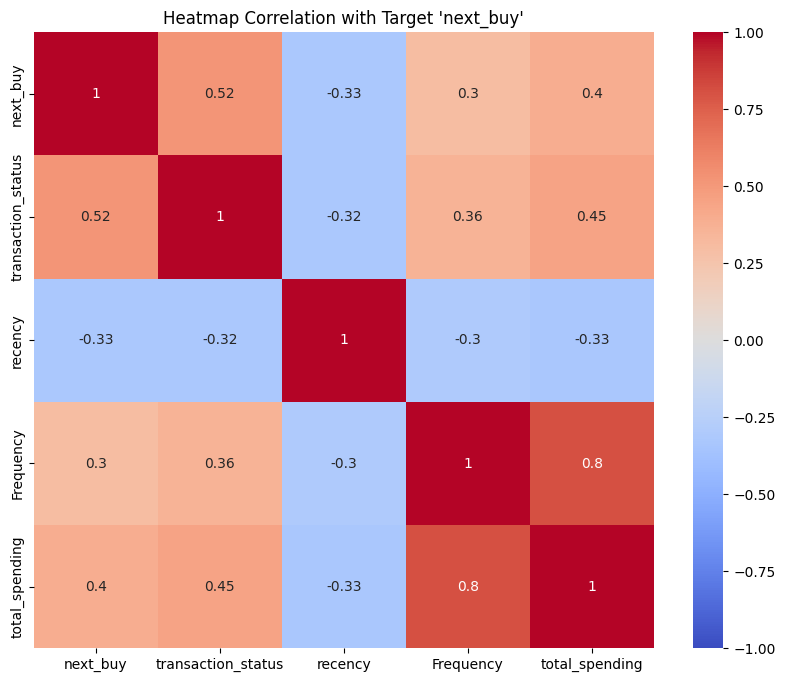

In [72]:
df_result_train['next_buy'] = pd.to_numeric(df_result_train['next_buy'], errors='coerce')

df_result_train['total_spending'] = pd.to_numeric(df_result_train['total_spending'], errors='coerce')

df_result_train['Frequency'] = pd.to_numeric(df_result_train['Frequency'], errors='coerce')

df_result_train['recency'] = pd.to_numeric(df_result_train['recency'], errors='coerce')





correlation = df_result_train.drop(columns=['MemberID', 'transactiondate']).corr()



plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Heatmap Correlation with Target 'next_buy'")

plt.show()

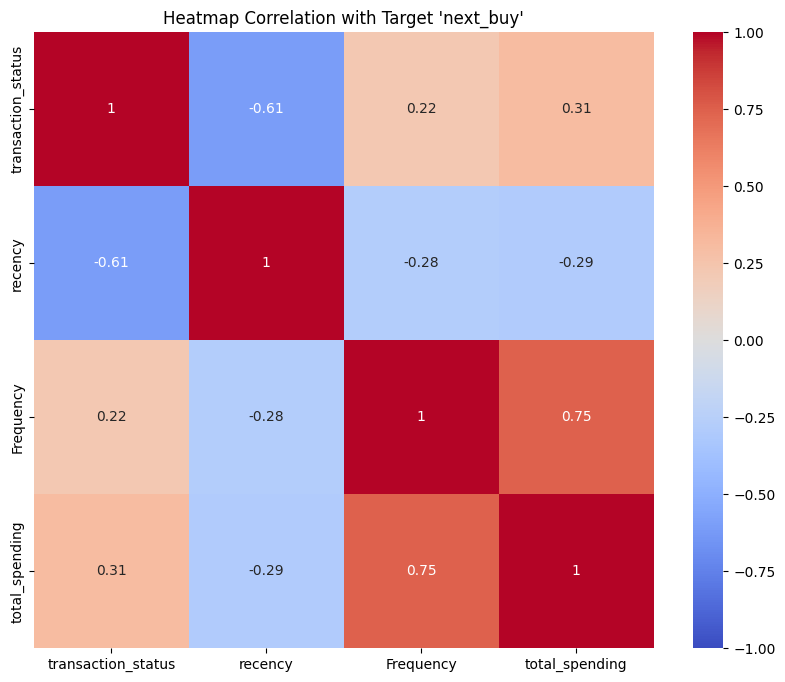

In [73]:
df_result_test['next_buy'] = pd.to_numeric(df_result_test['next_buy'], errors='coerce')

df_result_test['total_spending'] = pd.to_numeric(df_result_test['total_spending'], errors='coerce')

df_result_test['Frequency'] = pd.to_numeric(df_result_test['Frequency'], errors='coerce')

df_result_test['recency'] = pd.to_numeric(df_result_test['recency'], errors='coerce')



correlation = df_result_test.drop(columns=['MemberID', 'transactiondate', 'next_buy']).corr()



plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Heatmap Correlation with Target 'next_buy'")

plt.show()

In [74]:
# df_result_train['next_buy'] = pd.to_numeric(df_result_train['next_buy'], errors='coerce')

# df_result_train['total_spending'] = pd.to_numeric(df_result_train['total_spending'], errors='coerce')

# df_result_train['Frequency'] = pd.to_numeric(df_result_train['Frequency'], errors='coerce')

# # df_result_train['recency_duration'] = pd.to_numeric(df_result_train['recency_duration'], errors='coerce')





# correlation = df_result_train.drop(columns=['MemberID']).corr()



# plt.figure(figsize=(10, 8))

# sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# plt.title("Heatmap Correlation with Target 'next_buy'")

# plt.show()

In [75]:
# df_result_test['next_buy'] = pd.to_numeric(df_result_test['next_buy'], errors='coerce')

# df_result_test['total_spending'] = pd.to_numeric(df_result_test['total_spending'], errors='coerce')

# df_result_test['Frequency'] = pd.to_numeric(df_result_test['Frequency'], errors='coerce')







# correlation = df_result_test.drop(columns=['MemberID', 'next_buy']).corr()



# plt.figure(figsize=(10, 8))

# sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# plt.title("Heatmap Correlation with Target 'next_buy'")

# plt.show()

# Modelling

In [76]:
# from sklearn.model_selection import train_test_split 



# X= df_result_train.drop(['next_buy', 'MemberID'], axis=1) #kolom yg dipake

# y= df_result_train['next_buy'] #target



# X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42, 

#                           train_size=0.8, shuffle=True) 

In [77]:
# from sklearn.model_selection import train_test_split 



# X= df_result_train.drop(['next_buy', 'MemberID', 'recency', 'Frequency', 'transactiondate'], axis=1) #kolom yg dipake

# y= df_result_train['next_buy'] #target



# X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42, 

#                           train_size=0.7, shuffle=True) 

In [78]:
from sklearn.model_selection import train_test_split 



X= df_result_train.drop(['next_buy', 'MemberID', 'recency', 'Frequency', 'transactiondate'], axis =1) 

y= df_result_train['next_buy'] #target



X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42, 

                          train_size=0.7, shuffle=True) 

In [79]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier

#from xgboost import XGBClassifier

#from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score



def evaluate_models(X_train, y_train, X_test, y_test):

    models = {

        "Logistic Regression": LogisticRegression(),

        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),

        "Decision Tree": DecisionTreeClassifier(),

        "Random Forest": RandomForestClassifier(n_estimators=500),

        # "Support Vector Classifier": SVC(kernel='poly'),

        # "Naive Bayes": GaussianNB(),

        # "Gradient Boosting": GradientBoostingClassifier(),

        # "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=0.1)

       # "XGBoost": XGBClassifier(),

        #"LightGBM": LGBMClassifier()

    }

    

    results = {}



    for model_name, model in models.items():

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred)

        

        results[model_name] = {

            'f1_score': f1,

            'y_pred': y_pred

        }

        

        print(f"{model_name}: F1 Score = {f1:.4f}")

    

    return results



# Example of accessing predictions for a specific model

# print("Predictions for Random Forest:", results["Random Forest"]["y_pred"])

In [80]:
results = evaluate_models(X_train, y_train, X_test, y_test)

Logistic Regression: F1 Score = 0.0000
K-Nearest Neighbors: F1 Score = 0.2371
Decision Tree: F1 Score = 0.4181
Random Forest: F1 Score = 0.4219


In [81]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier

#from xgboost import XGBClassifier

#from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score



def evaluate_models(X_train, y_train, X_test, y_test):

    models = {

        # "Logistic Regression": LogisticRegression(),

        # "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),

        # "Decision Tree": DecisionTreeClassifier(),

        # "Random Forest": RandomForestClassifier(n_estimators=500),

        # "Support Vector Classifier": SVC(kernel='poly'),

        "Naive Bayes": GaussianNB(),

        "Gradient Boosting": GradientBoostingClassifier(),

        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=0.1)

       # "XGBoost": XGBClassifier(),

        #"LightGBM": LGBMClassifier()

    }

    

    results2 = {}



    for model_name, model in models.items():

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred)

        

        results2[model_name] = {

            'f1_score': f1,

            'y_pred': y_pred

        }

        

        print(f"{model_name}: F1 Score = {f1:.4f}")

    

    return results2



# Example of accessing predictions for a specific model

# print("Predictions for Random Forest:", results["Random Forest"]["y_pred"])

In [82]:
results2 = evaluate_models(X_train, y_train, X_test, y_test)

Naive Bayes: F1 Score = 0.3593
Gradient Boosting: F1 Score = 0.5195
AdaBoost: F1 Score = 0.4847


In [83]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier



# model = LogisticRegression()

# model = KNeighborsClassifier(n_neighbors=5),

# model = DecisionTreeClassifier()

# model = RandomForestClassifier(n_estimators=500)

# model = SVC(kernel='poly')

# model = GaussianNB()

model = GradientBoostingClassifier()

# model = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)



model.fit(X, y)

GradientBoostingClassifier()

In [84]:
# df_to_train= df_result_train.drop(['next_buy', 'MemberID', 'transaction_status', 'total_spending', 'transactiondate'], axis =1) 

# df_to_train.head(20)

In [85]:
# df_to_train= df_result_train.drop(['next_buy', 'MemberID', 'recency', 'Frequency', 'transactiondate'], axis =1) 

# df_to_train.head(20)

In [86]:
# df_to_test= df_result_test.drop(['next_buy', 'MemberID', 'recency', 'Frequency', 'transactiondate'], axis =1) 

# df_to_test.head(20)

In [87]:
# df_to_train = df_result_train.drop(['next_buy', 'MemberID', 'total_spending', 'Frequency', 'transactiondate'], axis =1) 

# df_to_train.head(20)

In [88]:
# y_pred_train = model.predict(df_to_train)

In [89]:
# df_predres_train = pd.DataFrame(y_pred_train, columns=['next_buy']) #results["model"]["y_pred"] sesuai model

# df_predres_train.head(200)

In [90]:
# df_submission1 = pd.read_csv('/kaggle/input/data-science-competition-2024-kominfo/train_label_data.csv')

# df_submission1['next_buy'] = df_predres_train['next_buy']

In [91]:
# df_submission1.head(200)

In [92]:
# correct_predictions = (df_submission1['next_buy'] == df_labels['next_buy']).sum()



# # Menghitung total data

# total_data_prediction = len(df_submission1)



# # Menghitung persentase kecocokan

# accuracy_percentage = (correct_predictions / total_data_prediction) * 100



# print(f"Persentase nilai 'next_buy' yang sama: {accuracy_percentage:.2f}%")

In [93]:
df_to_test= df_result_test.drop(['next_buy', 'MemberID', 'recency', 'Frequency', 'transactiondate'], axis =1) 

df_to_test.head(20)

,transaction_status,total_spending
0,0,495900.0
1,0,3143100.0
2,0,6228600.0
3,0,1468000.0
4,0,2566500.0
5,0,608400.0
6,1,1780700.0
7,0,825200.0
8,0,1106000.0
9,0,2818925.0


In [94]:
df_to_test.dtypes

transaction_status      int64
total_spending        float64
dtype: object

In [95]:
y_pred = model.predict(df_to_test)

In [96]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [97]:
df_predres = pd.DataFrame(y_pred, columns=['next_buy']) #results["model"]["y_pred"] sesuai model



df_submission2 = pd.read_csv('/kaggle/input/data-science-competition-2024-kominfo/submission_data.csv')

df_submission2['next_buy'] = df_predres['next_buy']

In [98]:
df_submission2['next_buy'].value_counts()

next_buy
0    5844
1     537
Name: count, dtype: int64

In [99]:
# df_submission2

In [100]:
df_submission2.to_csv('submission_HariMinggu_terakhir.csv', index=False)